## **Universidad Peruana de Ciencias Aplicadas**
### CC235 - Procesamiento de Imágenes
### Docente: Peter Montalvo <pcccpmon@upc.edu.pe>
### Aplicaciones Morfología matemática

---

### **Ejercicios de Morfología Matemática II**

In [9]:
import numpy as np
import scipy.io
import skimage.morphology as morph
from skimage.io import imread
from skimage.measure import label
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
%matplotlib inline

Vamos a leer una imagen y crear el elemento estructurante

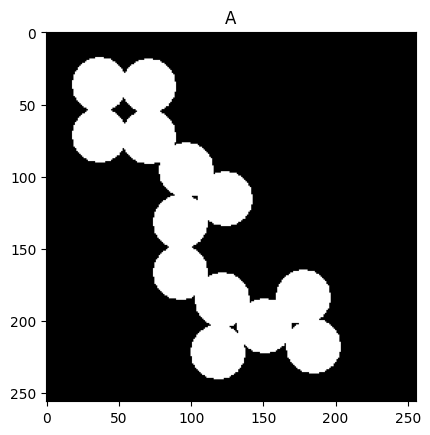

In [10]:
A = imread('https://www.mathworks.com/help/images/morph_close.png')[:,:256]/255
plt.title("A")
plt.imshow(A, cmap='gray')
plt.show()

In [11]:
B = morph.square(3)
B

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

Realicemos la siguiente operación $A - (A \ominus B)$

**Hint:** Recuerde que el operador $\ominus$ significa erosión binaria.

In [12]:
im_result = A - morph.erosion(A,B)
plt.imshow(im_result, cmap='gray')

RuntimeError: ignored

### **Ejercicio 1**

Genere una imagen de bordes en la que las líneas correspondan únicamente a círculos y no a círculos traslapados como se ve en la imagen anterior.

In [ ]:
#desarrolle su código aquí

im_result = morph.erosion(A, morph.disk(9))
im_result = morph.erosion(im_result, morph.disk(9))

im_result = morph.dilation(im_result, morph.disk(3))
im_result = morph.dilation(im_result, morph.disk(12))

im_result = im_result - morph.erosion(im_result, morph.square(3))

plt.imshow(im_result, cmap='gray')

### **Ejercicio 2**

Usando el resultado del ejercicio anterior, desarrolle una forma de controlar el grosor de la línea

In [13]:
#@title Controlar propiedades de la línea de borde { run: "auto" }
line_width = 1 #@param {type:"slider", min:1, max:10, step:1}

#desarrolle su código aquí

im_result = morph.erosion(A, morph.disk(9))
im_result = morph.erosion(im_result, morph.disk(9))

im_result = morph.dilation(im_result, morph.disk(3))
im_result = morph.dilation(im_result, morph.disk(12))

im_result = im_result - morph.erosion(im_result, morph.square(2*line_width +1 ))

plt.imshow(im_result, cmap='gray')

RuntimeError: ignored

### **Ejercicio 3**

Vamos a cargar imágenes de la suite Mamba

In [ ]:
!wget -q -O Mamba_Images.zip http://cmm.ensmp.fr/~beucher/stockage/Mamba_Images.zip
!unzip -q Mamba_Images.zip

A continuación, leamos una de las imágenes

In [ ]:
cat = imread('Mamba_Images/bin/bigcat.bmp')//255
plt.figure()
plt.imshow(cat, cmap='gray')
plt.axis('off')
plt.show()

**Ejercicio 3.1**: Usando operadores morfológicos desarrolle una rutina que mueva al gato un pixel a la derecha, cada vez que sea llamada

In [ ]:
#desarrolle su código aquí
import imageio

im_result = cat
B = np.zeros((3,3))
B[1,0] = 1
B

In [ ]:

print(B)
gif = []

for i in range(300):
  im_result = morph.dilation(im_result, B)
  gif.append(im_result*255)




In [ ]:
gif

In [ ]:
imageio.mimsave('gato.gif', gif)

In [ ]:
from IPython.display import Image
Image('gato.gif', format='png')